## Aprendizaje No Supervisado 

## Importación de Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
import io

## Lectura del dataset

In [18]:
df_w_gk= pd.read_csv("final_df.csv")\
            .drop(columns="Unnamed: 0")
df_w_gk.head(3)

short_position  GKDiving  Composure  Finishing  Vision  Strength  Stamina  \
0          front       6.0       96.0       95.0    94.0      59.0     72.0   
1          front       7.0       95.0       94.0    82.0      79.0     88.0   
2       midfield       9.0       94.0       87.0    87.0      49.0     81.0   

   Jumping  ShotPower  Reactions  Agility  Dribbling  HeadingAccuracy  
0     68.0       85.0       95.0     91.0       97.0             70.0  
1     95.0       95.0       96.0     87.0       88.0             89.0  
2     61.0       80.0       94.0     96.0       96.0             62.0

## PCA con Goalkeeper

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [22]:
X_sc = df_w_gk.drop(columns="short_position")
short_position= df_w_gk.short_position

In [23]:
scaler = StandardScaler()
X_sc_st = scaler.fit_transform(X_sc)

In [24]:
from sklearn.decomposition import PCA
_, nof_components = X_sc_st.shape
pcamodel = PCA(n_components=nof_components)
pca = pcamodel.fit_transform(X_sc_st)
pca.shape

(4749, 12)

Se muestra la varianza explicada acumulada por cada componente. El primer componente explica el 47,77% de la variación de los datos. Luego, el primer y segundo componente explican el 65,31% y asi sucesivamente.

In [25]:
explained_variance=pcamodel.explained_variance_ratio_
acc_variance_percent = np.cumsum(np.round(explained_variance, decimals=5) * 100)
acc_variance_percent

array([ 47.77 ,  65.311,  75.042,  82.888,  87.073,  90.495,  93.636,
        95.661,  97.261,  98.592,  99.488, 100.   ])

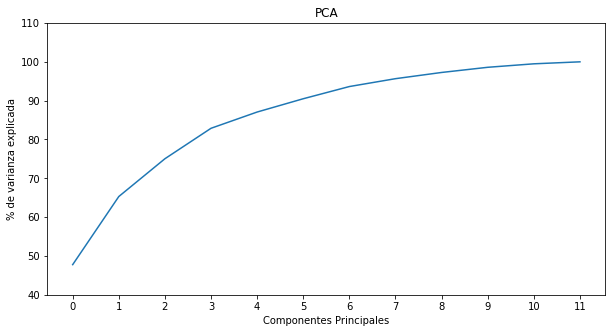

In [26]:
plt.figure(figsize=(10, 5))
plt.ylabel('% de varianza explicada')
plt.xlabel('Componentes Principales')
plt.title('PCA')
plt.ylim(40, 110)
plt.xticks(range(nof_components))
plt.plot(acc_variance_percent)

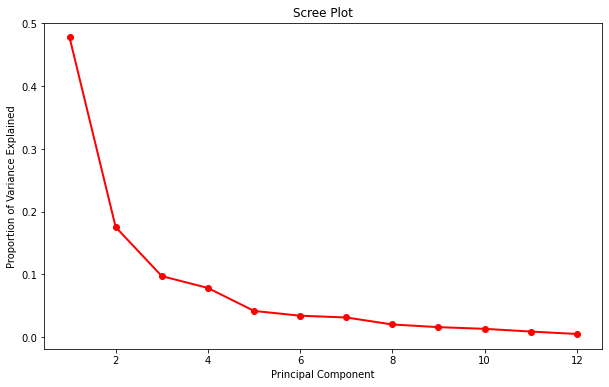

In [27]:
PC_values = np.arange(pcamodel.n_components_) + 1

plt.figure(figsize=(10,6))
plt.plot(PC_values, pcamodel.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

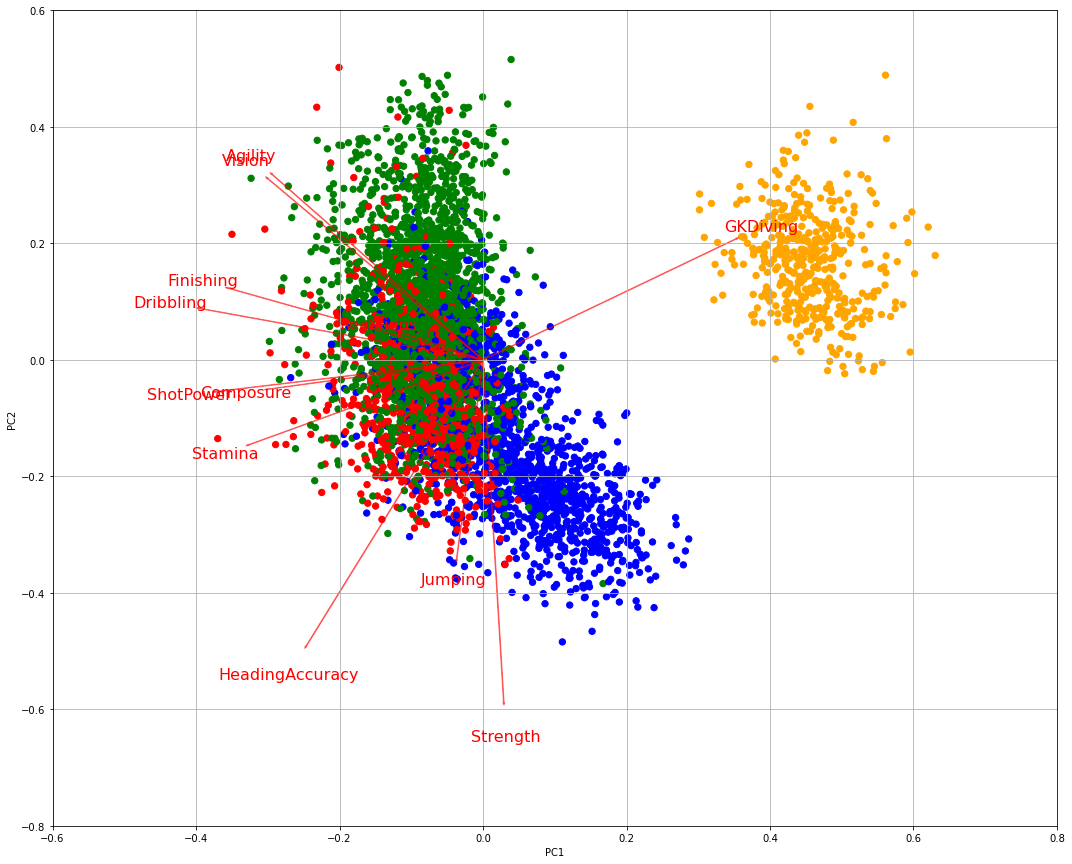

In [24]:
palette= {'front': 'red',
         'midfield': 'green',
         'goalkeeper': 'orange',
         'back': 'blue'}

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=40, c=short_position.map(palette))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color = 'r', ha = 'center', va = 'center', fontsize= 16)
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color = 'r', ha = 'center', va = 'center', fontsize= 16)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.ylim(-0.8, 0.6)
    plt.xlim(-0.6, 0.8)
    plt.grid()

plt.figure(figsize=(18, 15))
myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(X_sc.columns))
plt.show()


In [27]:
pca_df = pd.DataFrame(data = pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])

In [30]:
pca_df= pca_df.drop(columns=['PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
pca_df.head(3)

PC1       PC2       PC3       PC4       PC5       PC6
0 -4.946957  1.773624  4.041766  0.187256  0.000400 -0.615178
1 -5.227239 -1.112031  4.425234 -1.261241  0.422350  0.101355
2 -4.570100  2.563992  3.531679  0.026186 -1.061535 -0.535459

## Clustering con Goalkeeper

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

### Visualización mediante embeding TSNE

In [31]:
seed = 0
X_TSNE = TSNE(n_components=2,
              verbose=1,
              perplexity=30,
              n_iter=1000,
              init='random',
              random_state=seed).fit_transform(pca_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4749 samples in 0.021s...
[t-SNE] Computed neighbors for 4749 samples in 0.276s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4749
[t-SNE] Computed conditional probabilities for sample 2000 / 4749
[t-SNE] Computed conditional probabilities for sample 3000 / 4749
[t-SNE] Computed conditional probabilities for sample 4000 / 4749
[t-SNE] Computed conditional probabilities for sample 4749 / 4749
[t-SNE] Mean sigma: 0.494070
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.458405
[t-SNE] KL divergence after 1000 iterations: 1.664894


In [32]:
df_TSNE = pd.DataFrame(X_TSNE).assign(position=short_position)

<AxesSubplot:title={'center':'TSNE with position'}, xlabel='TSNE 2', ylabel='TSNE 1'>

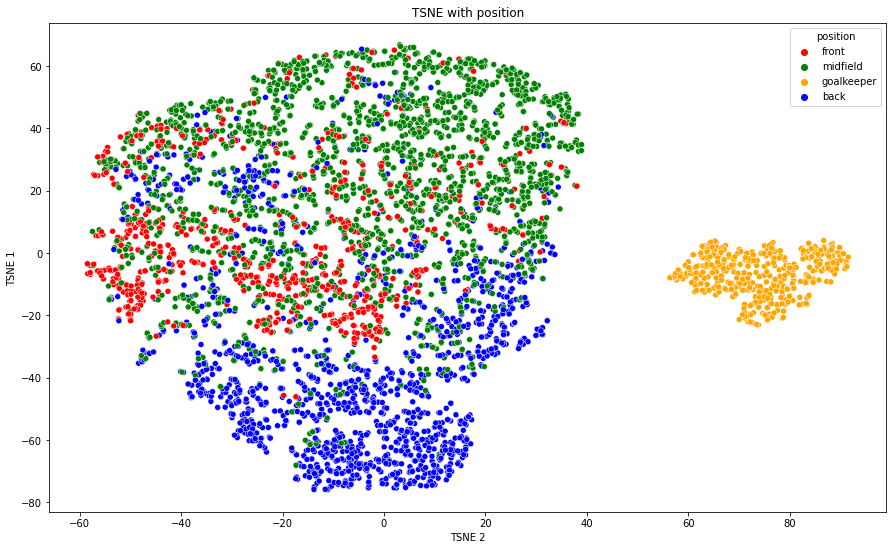

In [33]:
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE with position')
sns.scatterplot(data=df_TSNE,
                x=0,
                y=1,
                palette={'front': 'red',
                         'midfield': 'green',
                         'goalkeeper': 'orange',
                         'back': 'blue'},
                hue='position')

Se vuelve a observar que los _Goalkeeper_ se diferencian del resto de las posiciones. Asimismo, los defensores parecieran estar mas diferenciados de los centrocampistas y los delanteros.

### Clustering KMeans

In [34]:
def plot_cluster_range (X, X_TSNE, range_n_clusters):
    sse ={}
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=seed, n_init = 100 )
        cluster_labels = clusterer.fit_predict(X)
        sse[n_clusters] = clusterer.inertia_

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("Para n_clusters =", n_clusters,
              "El silhouette_score promedio es :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Visualizacion de los datos.")
        ax1.set_xlabel("espacio de la primera caracteristica")
        ax1.set_ylabel("espacio de la segunda caracteristica")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_TSNE[:, 0], X_TSNE[:, 1]
                    , marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("Visualizacion de los datos.")
        ax2.set_xlabel("espacio de la primera caracteristica")
        ax2.set_ylabel("espacio de la segunda caracteristica")

        plt.suptitle(("Analisis de silueta para Kmedias "
                      "con n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

    plt.show()

Para n_clusters = 3 El silhouette_score promedio es : 0.3120192817546181
Para n_clusters = 4 El silhouette_score promedio es : 0.2542353646216446
Para n_clusters = 5 El silhouette_score promedio es : 0.2317155719021479
Para n_clusters = 6 El silhouette_score promedio es : 0.2187393046234914


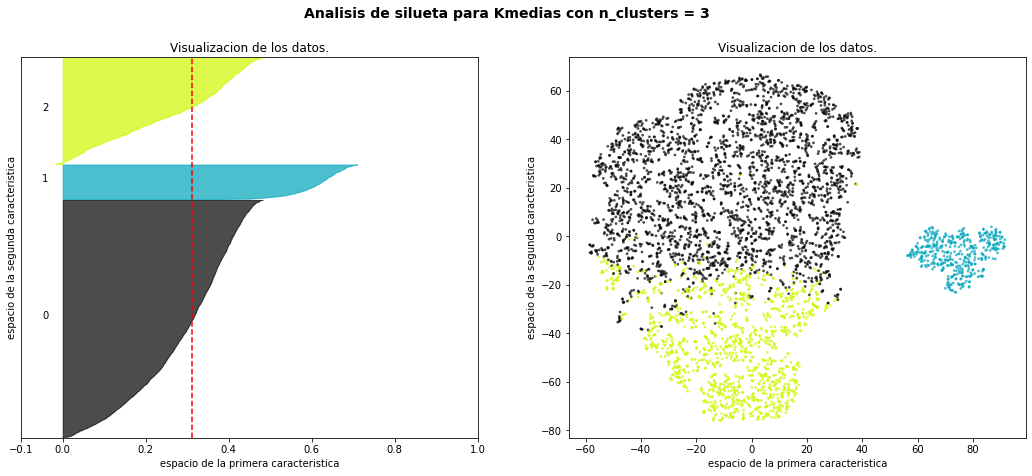

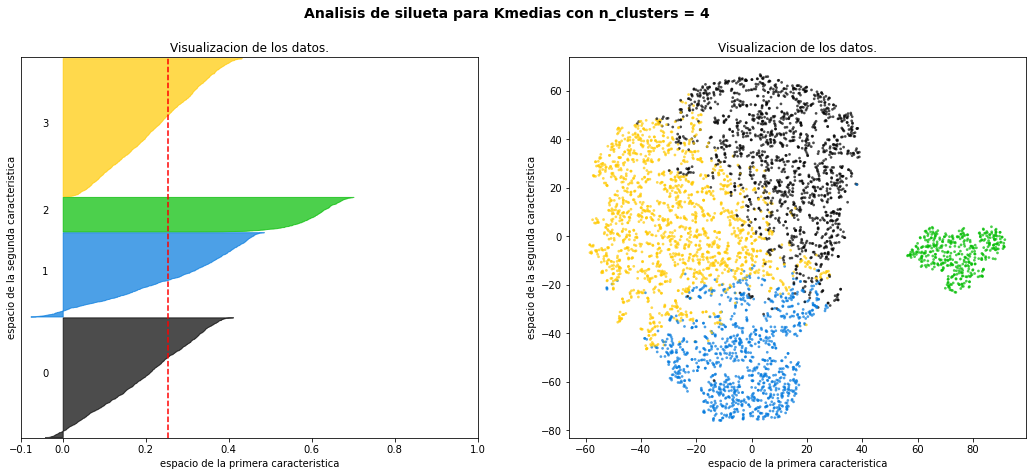

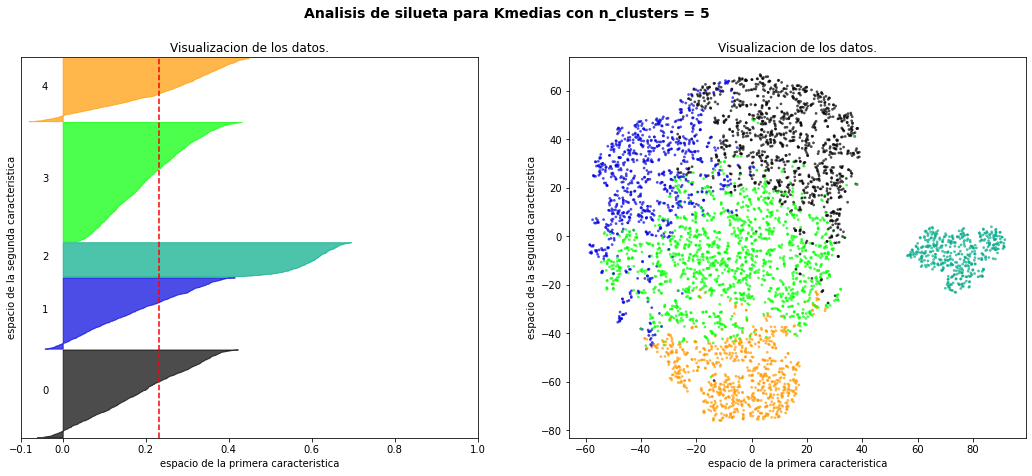

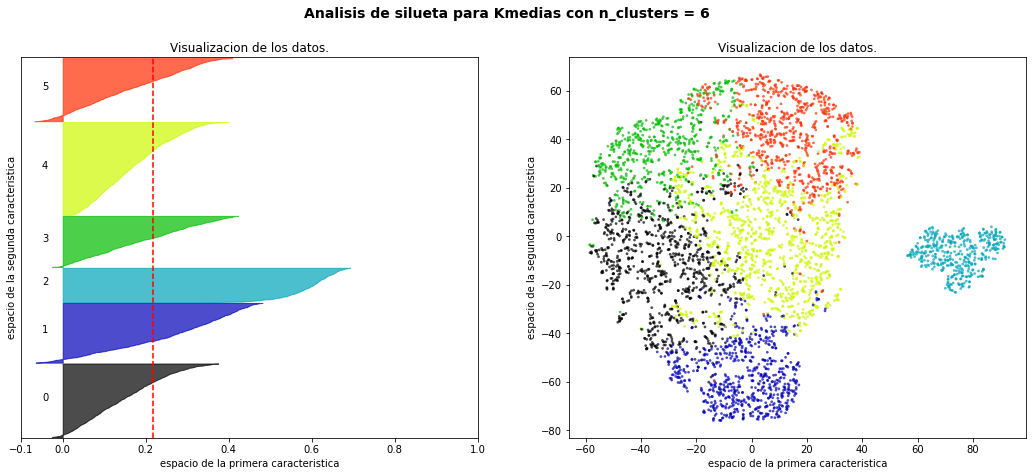

In [39]:
range_n_clusters = [3, 4, 5, 6]
plot_cluster_range(pca_df, X_TSNE, range_n_clusters)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

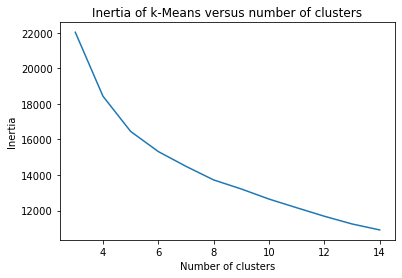

In [41]:
scores = [KMeans(n_clusters=i, random_state = 28).fit(pca_df).inertia_ for i in range(3,15)]

plt.plot(np.arange(3, 15), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Si bien no se observa un quiebre pronunciado en el gráfico del codo, se seleccionó 4 como número de clusters siendo el punto de inflexión en esta gráfica. Además, se tuvo en cuenta el gráfico de silueta asociado a este número de clusters el cual posee la menor cantidad de valores negativos.

#### Número de clusters seleccionado

In [42]:
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=seed)
km.fit(pca_df)

df_w_gk = df_w_gk.assign(kmeans_cluster=km.labels_)

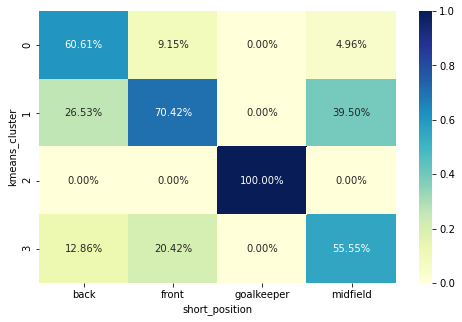

In [43]:
plt.figure(figsize=(8, 5))
exp = pd.crosstab(
    df_w_gk.kmeans_cluster,
    df_w_gk.short_position,
    normalize='columns')
sns.heatmap(exp, annot=True, fmt='.2%', cmap="YlGnBu")
plt.show()

Se observa que el cluster que contiene a los _Goalkeeper_ tiene una completitud de toda la clase a diferencia de los restantes clusters en donde hay heterogeneidad de clases. El cluster número 2 posee la mayoría de los defensores, mientras que el cluster número 1 posee la mayoria de los delanteros. Los centrocampistas están distribuídos entre el cluster número 1 y 3.

<AxesSubplot:xlabel='Dribbling', ylabel='HeadingAccuracy'>

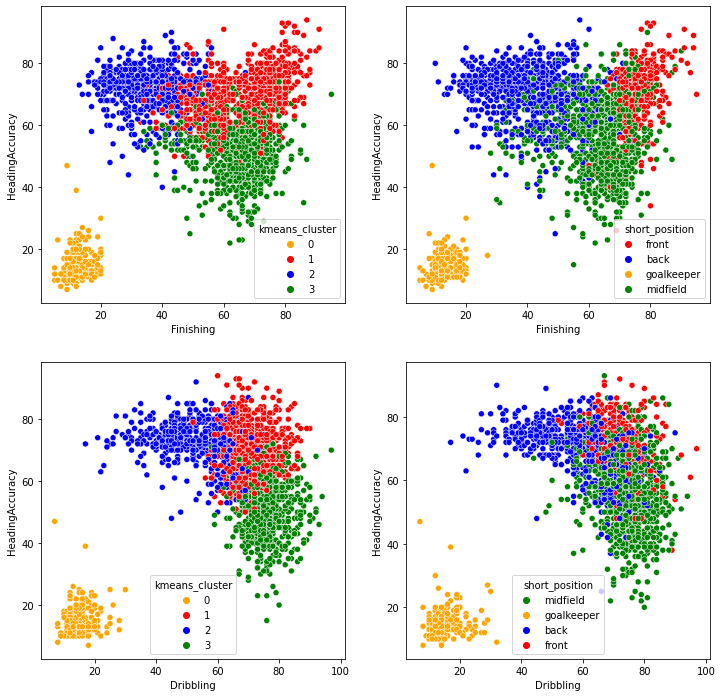

In [28]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
sns.scatterplot(data=df_w_gk[["kmeans_cluster","Finishing","HeadingAccuracy"]].sample(2500), x="Finishing", y="HeadingAccuracy",
                hue='kmeans_cluster',palette= {1: 'red',3: 'green',0: 'orange',2:'blue'}, ax=axes[0][0])
sns.scatterplot(data=df_w_gk[["short_position","Finishing","HeadingAccuracy"]].sample(2500),x="Finishing", y="HeadingAccuracy",
                hue="short_position", palette= {'front': 'red','midfield': 'green','goalkeeper': 'orange',
                       'back': 'blue'}, ax=axes[0][1])

sns.scatterplot(data=df_w_gk[["kmeans_cluster","Dribbling","HeadingAccuracy"]].sample(2500), x="Dribbling", y="HeadingAccuracy",
                hue='kmeans_cluster',palette= {1: 'red',3: 'green',0: 'orange',2:'blue'}, ax=axes[1][0])
sns.scatterplot(data=df_w_gk[["short_position","Dribbling","HeadingAccuracy"]].sample(2500),x="Dribbling", y="HeadingAccuracy",
                hue="short_position", palette= {'front': 'red','midfield': 'green','goalkeeper': 'orange',
                       'back': 'blue'}, ax=axes[1][1])


En esta gráfica podemos observar como el algoritmo de k-means puede encontrar las posiciones de Goalkeeper y Back, sin embargo la posición Front es la menos encontrada. Esto podría deberse a que muchos defensores y mediocampistas suelen tener algunas habilidades que se asemejan a las de la posición delantera. 
Esto también se ve reflejado en los valores bajos de las métricas que calculamos a continuación. 

In [44]:
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score

labels_pred = df_w_gk.kmeans_cluster
labels_true = df_w_gk.short_position

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_sc, labels_pred))

Silhouette Coefficient: 0.221


In [45]:
h, c, v = homogeneity_completeness_v_measure(labels_true, labels_pred)

In [46]:
print("Homogeneity: %0.3f" % h)
print("Completeness: %0.3f" % c)
print("V-measure: %0.3f" % v)

Homogeneity: 0.412
Completeness: 0.393
V-measure: 0.402


### Clustering Mean Shift

Estimated number of clusters: 2
Homogeneity: 0.245
Completeness: 0.970
V-measure: 0.391
Adjusted Rand Index: 0.177
Adjusted Mutual Information: 0.391
Silhouette Coefficient: 0.626


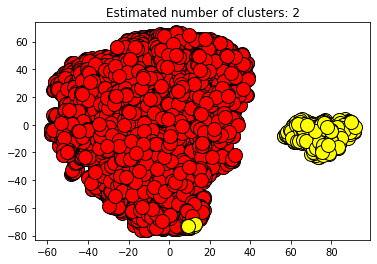

In [47]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(pca_df, quantile=0.5)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pca_df)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels)

print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_sc, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_TSNE[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
   
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

El análisis de cluster realizado con MeanShift muestra un número de 2 clusters que probablemente se refieran a los _Goalkeepers_ y el resto de las posiciones agrupadas (defensores, mediocampistas y delanteros). 

## Clustering sin Goalkeeper

In [56]:
scaler = StandardScaler()
seed = 0

df_wout_gk= df_w_gk[df_w_gk.short_position!= "goalkeeper"].reset_index(drop=True)

X = df_wout_gk.drop(columns=["short_position", "GKDiving", "kmeans_cluster"])

X_sc_wout_gk = scaler.fit_transform(X)

In [65]:
_, nof_components = X_sc_wout_gk.shape
pcamodel_wout_gk= PCA(n_components=nof_components)
pca_wout_gk = pcamodel_wout_gk.fit_transform(X_sc_wout_gk)
pca_wout_gk.shape

(4314, 11)

Se muestra la varianza explicada acumulada por cada componente. El primer componente explica el 47,77% de la variación de los datos. Luego, el primer y segundo componente explican el 65,31% y asi sucesivamente.

In [66]:
explained_variance_wout_gk=pcamodel_wout_gk.explained_variance_ratio_
acc_variance_percent_wout_gk = np.cumsum(np.round(explained_variance_wout_gk, decimals=5) * 100)
acc_variance_percent_wout_gk

array([ 39.61 ,  57.723,  68.507,  77.072,  84.068,  88.139,  91.322,
        94.069,  96.412,  98.517, 100.001])

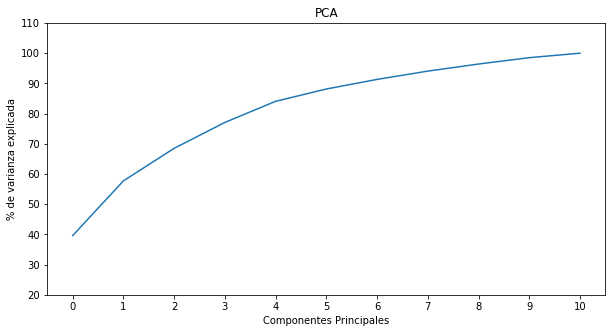

In [67]:
plt.figure(figsize=(10, 5))
plt.ylabel('% de varianza explicada')
plt.xlabel('Componentes Principales')
plt.title('PCA')
plt.ylim(20, 110)
plt.xticks(range(nof_components))
plt.plot(acc_variance_percent_wout_gk)

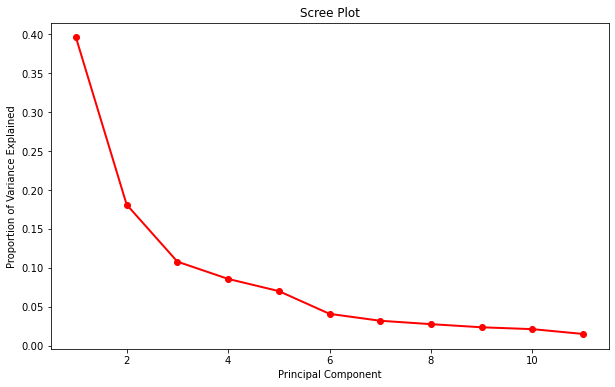

In [68]:
PC_values_wout_gk = np.arange(pcamodel_wout_gk.n_components_) + 1

plt.figure(figsize=(10,6))
plt.plot(PC_values_wout_gk, pcamodel_wout_gk.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

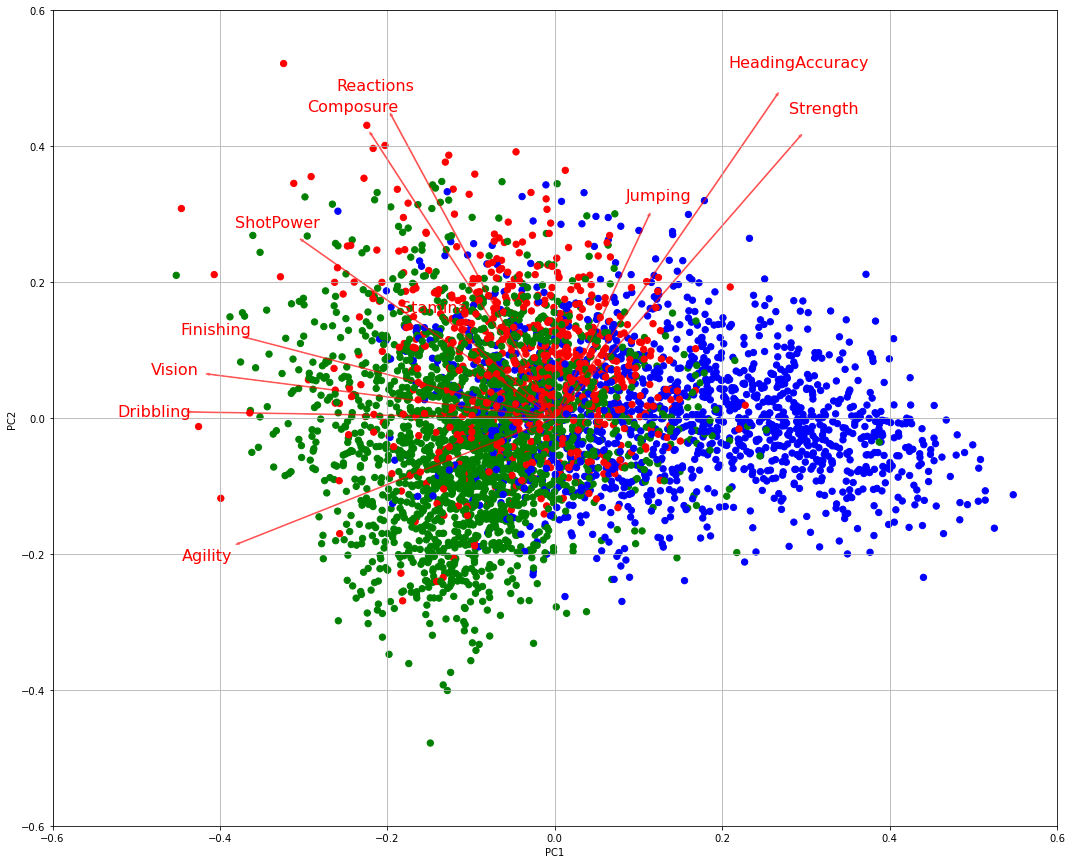

In [73]:
palette_wout_gk= {'front': 'red',
         'midfield': 'green',
         'back': 'blue'}
short_position_wout_out=df_wout_gk.short_position

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=40, c=short_position_wout_out.map(palette_wout_gk))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color = 'r', ha = 'center', va = 'center', fontsize= 16)
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color = 'r', ha = 'center', va = 'center', fontsize= 16)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.ylim(-0.6, 0.6)
    plt.xlim(-0.6, 0.6)
    plt.grid()

plt.figure(figsize=(18, 15))
myplot(pca_wout_gk[:,0:2],np.transpose(pcamodel_wout_gk.components_[0:2, :]),list(X.columns))
plt.show()


In [74]:
pca_df_wout_gk = pd.DataFrame(data = pca_wout_gk, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])

In [75]:
pca_df_wout_gk= pca_df_wout_gk.drop(columns=['PC8', 'PC9', 'PC10', 'PC11'])
pca_df_wout_gk.head(3)

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -5.736780  3.765847  0.799298  1.951354  1.598907  0.682877 -0.316787
1 -4.166225  6.370512 -1.056732  0.419774  1.136523  0.590958  0.135204
2 -5.815852  2.565206 -0.018230  2.633490  1.069112  0.895526 -0.079714

### Visualización mediante embeding TSNE

In [76]:
X_TSNE = TSNE(n_components=2,
              verbose=1,
              perplexity=30,
              n_iter=1000,
              init='random',
              random_state=seed).fit_transform(pca_df_wout_gk)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4314 samples in 0.010s...
[t-SNE] Computed neighbors for 4314 samples in 0.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4314
[t-SNE] Computed conditional probabilities for sample 2000 / 4314
[t-SNE] Computed conditional probabilities for sample 3000 / 4314
[t-SNE] Computed conditional probabilities for sample 4000 / 4314
[t-SNE] Computed conditional probabilities for sample 4314 / 4314
[t-SNE] Mean sigma: 0.652843
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.734283
[t-SNE] KL divergence after 1000 iterations: 1.875901


In [77]:
df_TSNE = pd.DataFrame(X_TSNE).assign(position=df_wout_gk.short_position)

<AxesSubplot:title={'center':'TSNE with position'}, xlabel='TSNE 2', ylabel='TSNE 1'>

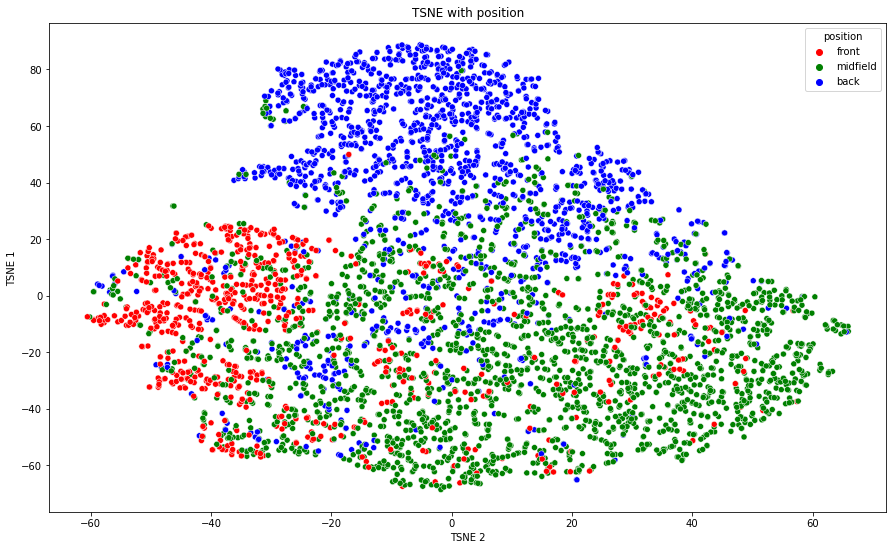

In [78]:
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE with position')
sns.scatterplot(data=df_TSNE,
                x=0,
                y=1,
                palette={'front': 'red',
                         'midfield': 'green',
                         'back': 'blue'},
                hue='position')

Observamos que los defensores se encuentran en su mayoría en el conjunto de puntos superior, los mediocampistas en el conjunto que se encuentra en la derecha y los delanteros casi exclusivamente en la zona izquierda. 

### Clustering KMeans

Para n_clusters = 2 El silhouette_score promedio es : 0.2987842300077575
Para n_clusters = 3 El silhouette_score promedio es : 0.2022126323419503
Para n_clusters = 4 El silhouette_score promedio es : 0.1809067134128773
Para n_clusters = 5 El silhouette_score promedio es : 0.17009020603076053
Para n_clusters = 6 El silhouette_score promedio es : 0.14527798672292294


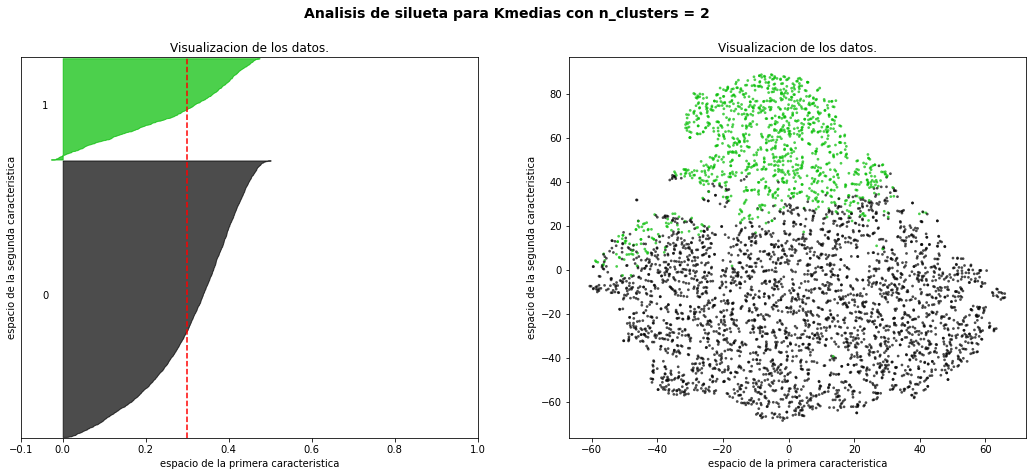

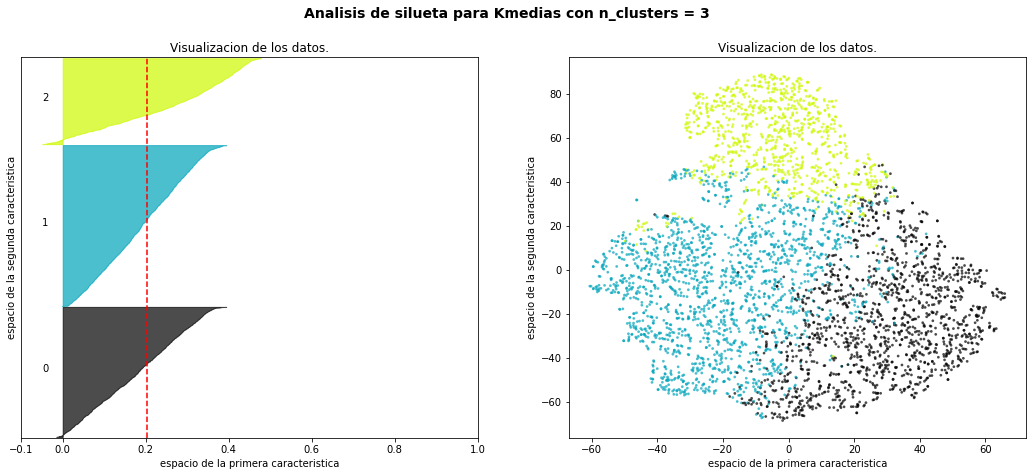

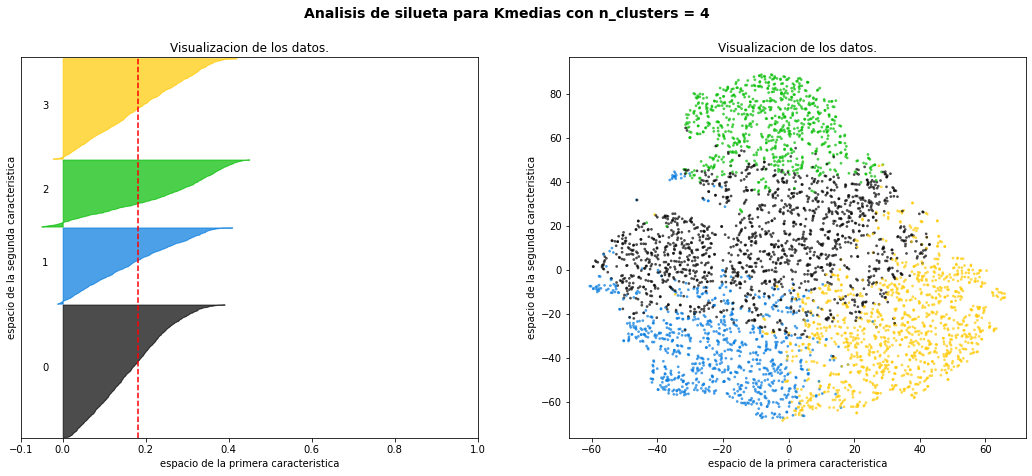

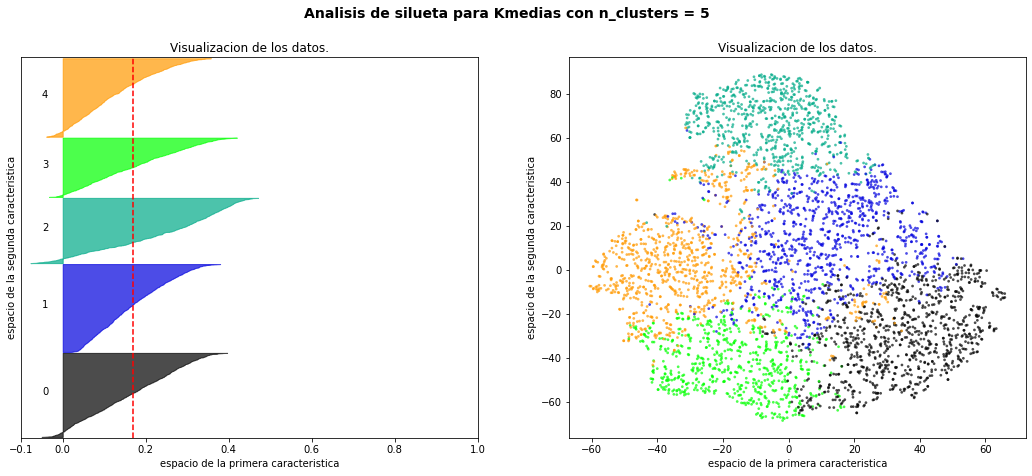

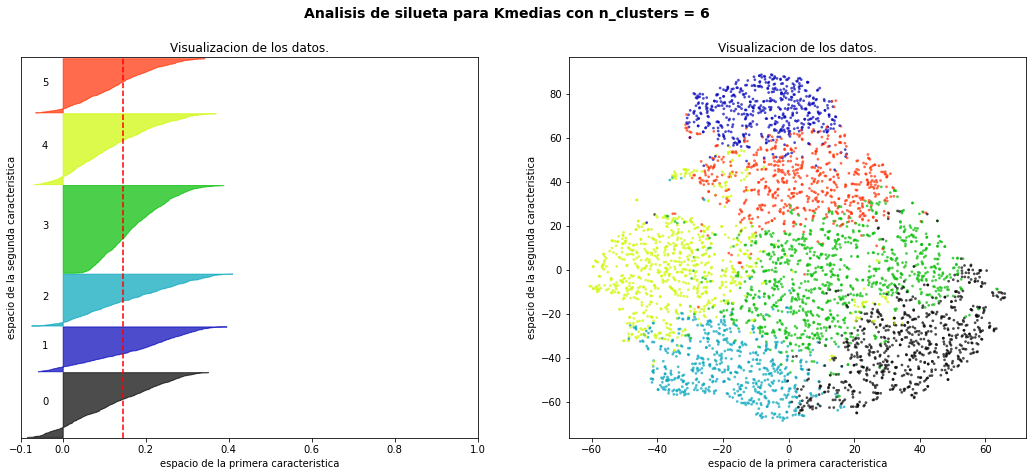

In [79]:
range_n_clusters = [2, 3, 4, 5, 6]
plot_cluster_range(pca_df_wout_gk, X_TSNE, range_n_clusters)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

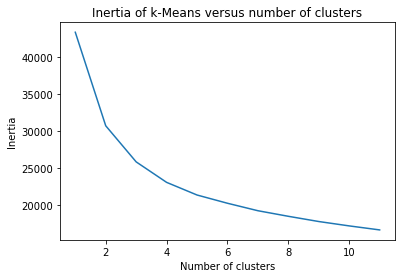

In [82]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i, random_state = seed).fit(pca_df_wout_gk).inertia_ for i in range(1,12)]

plt.plot(np.arange(1, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Observamos un punto de inflexión para el nivel de clusters 3.

#### Número de clusters seleccionado

In [83]:
n_clust = 3

km = KMeans(n_clusters=n_clust, random_state=seed)
km.fit(pca_df_wout_gk)

pca_df_wout_gk = pca_df_wout_gk.assign(kmeans_cluster=km.labels_)

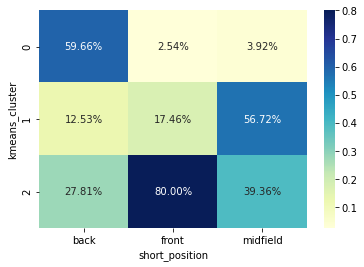

In [84]:
exp = pd.crosstab(
    pca_df_wout_gk.kmeans_cluster,
    df_wout_gk.short_position,
    normalize='columns')
sns.heatmap(exp, annot=True, fmt='.2%', cmap="YlGnBu")
plt.show()

Observamos que la posición delanteros está en su mayoría en el cluster 1, la posición de defensores en su mayoría en el cluster 0 y la posición mediocampistas está en su mayoría en el cluster 2. Tanto los defensores como los mediocampistas se encuentran más repartidos entre los diferentes clusters, lo cual explica las métrica bajas que calculamos a continuación. 
También podemos concluir que los menores valores de estas métricas se pueden deber al hecho de haber sacado a los arqueros en la búsqueda de clusters.  

In [85]:
labels_pred = pca_df_wout_gk.kmeans_cluster
labels_true = df_wout_gk.short_position

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(X_sc_wout_gk, labels_pred))

Silhouette Coefficient: 0.179


In [86]:
h, c, v = homogeneity_completeness_v_measure(labels_true, labels_pred)

In [87]:
print("Homogeneity: %0.3f" % h)
print("Completeness: %0.3f" % c)
print("V-measure: %0.3f" % v)

Homogeneity: 0.252
Completeness: 0.239
V-measure: 0.245


<AxesSubplot:xlabel='Dribbling', ylabel='HeadingAccuracy'>

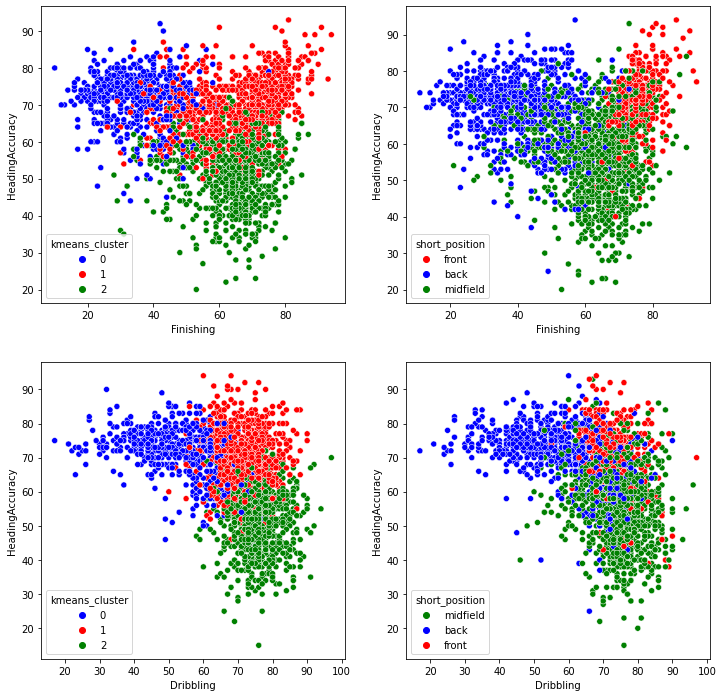

In [74]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
sns.scatterplot(data=df_wout_gk[["kmeans_cluster","Finishing","HeadingAccuracy"]].sample(2500), x="Finishing", y="HeadingAccuracy",
                hue='kmeans_cluster',palette= {1: 'red',2: 'green',0: 'blue'}, ax=axes[0][0])
sns.scatterplot(data=df_wout_gk[["short_position","Finishing","HeadingAccuracy"]].sample(2500),x="Finishing", y="HeadingAccuracy",
                hue="short_position", palette= {'front': 'red','midfield': 'green',
                       'back': 'blue'}, ax=axes[0][1])

sns.scatterplot(data=df_wout_gk[["kmeans_cluster","Dribbling","HeadingAccuracy"]].sample(2500), x="Dribbling", y="HeadingAccuracy",
                hue='kmeans_cluster',palette= {1: 'red',2: 'green',0: 'blue'}, ax=axes[1][0])
sns.scatterplot(data=df_wout_gk[["short_position","Dribbling","HeadingAccuracy"]].sample(2500),x="Dribbling", y="HeadingAccuracy",
                hue="short_position", palette= {'front': 'red','midfield': 'green',
                       'back': 'blue'}, ax=axes[1][1])

### Clustering Mean Shift

Estimated number of clusters: 8
Homogeneity: 0.229
Completeness: 0.259
V-measure: 0.243
Adjusted Rand Index: 0.206
Adjusted Mutual Information: 0.242


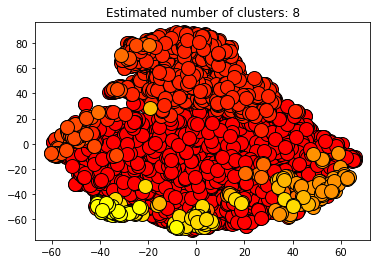

In [88]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(pca_df_wout_gk, quantile=0.05)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pca_df_wout_gk)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels)

print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X_sc_wout_gk, labels))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_TSNE[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
   
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Observamos que los clusters encontrados tienen métricas muy bajas métricas, por lo cuál podemos decir que los otros métodos son mejores para este conjunto de datos. 